In [11]:
# Realizar una descripción del dataset detallando nombres de las columnas, tipos de datos y descripción de cada una.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


spotify = pd.read_csv('./spotify.csv')
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   float64
 2   acousticness  1000 non-null   float64
 3   danceability  1000 non-null   float64
 4   duration_ms   1000 non-null   float64
 5   energy        1000 non-null   float64
 6   liveness      1000 non-null   float64
 7   loudness      1000 non-null   float64
 8   speechiness   1000 non-null   float64
 9   tempo         1000 non-null   float64
 10  valence       1000 non-null   float64
dtypes: float64(10), object(1)
memory usage: 86.1+ KB


In [6]:
# Mostrar un conjunto reducido de filas (primeras)

spotify.head(5)

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99.0,0.0421,0.726,190440.0,0.554,0.1060,-5.290,0.0917,169.999,0.335
1,Dance,83.0,0.1090,0.775,208787.0,0.613,0.1340,-4.586,0.0542,100.066,0.797
2,Dance,87.0,0.0441,0.737,222653.0,0.636,0.3500,-4.546,0.0437,105.005,0.565
3,Dance,78.0,0.0203,0.586,220573.0,0.701,0.0550,-5.326,0.0416,104.957,0.254
4,Dance,72.0,0.4220,0.728,200773.0,0.646,0.0899,-4.387,0.0463,103.983,0.460


In [7]:
# Mostrar un conjunto reducido de filas (últimas)

spotify.tail(5)

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
995,Soul,42.0,0.73300,0.587,146693.0,0.380,0.393,-8.912,0.0251,85.214,0.6380
996,Soul,43.0,0.00152,0.445,175427.0,0.637,0.129,-5.672,0.0342,89.847,0.0863
997,Soul,41.0,0.00280,0.508,303640.0,0.619,0.111,-7.072,0.1950,91.895,0.2470
998,Soul,44.0,0.42600,0.674,246787.0,0.571,0.123,-5.675,0.0842,97.126,0.5110
999,Soul,42.0,0.06440,0.784,200533.0,0.377,0.111,-9.594,0.0326,106.018,0.3410


In [8]:
# Reportar cantidad de valores nulos por columna.

spotify.isna().sum()

genre           0
popularity      0
acousticness    0
danceability    0
duration_ms     0
energy          0
liveness        0
loudness        0
speechiness     0
tempo           0
valence         0
dtype: int64

In [17]:
# Variables cualitativas:

# Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de filas correspondientes a cada uno.
# Armar un nuevo dataframe con estos datos

dataTypeDict = dict(spotify.dtypes)

cols_cualitativas = []

for col, type in dataTypeDict.items():
    if type == 'object':
        cols_cualitativas.append(col)

cols_cualitativas

spotify[cols_cualitativas[0]].value_counts()
spotify[cols_cualitativas[0]].count()

new_df = pd.DataFrame({'genre': spotify[cols_cualitativas[0]].value_counts()})
new_df

,genre
Pop,82
Electronic,81
Jazz,81
Folk,80
Hip-Hop,80
Rock,80
World,79
Reggaeton,78
Reggae,76
Dance,75


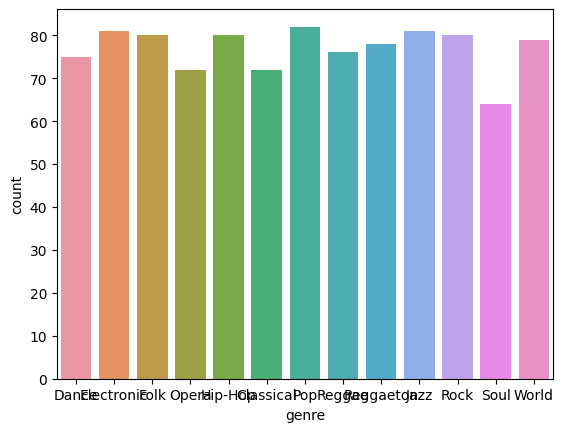

In [14]:
# Variables cualitativas:

# Compare en un gráfico de barras la cantidad de filas pertenecientes a cada valor.
# ¿Es posible realizar este gráfico con un histograma? Explique las diferencias entre estos dos tipos de gráficos.

# Se pedia el grafico de barras y que expliquen conceptualmente las diferencias entre histograma y barplot. 
# Es decir, por ejemplo, si la variable es cuantitativa continua ¿ qué gráfico es adecuado? ¿ y si es cualitativa?

dataTypeDict = dict(spotify.dtypes)

cols_cualitativas = []

for col, type in dataTypeDict.items():
    if type == 'object':
        cols_cualitativas.append(col)

cols_cualitativas

new_df = pd.DataFrame({'genre': spotify[cols_cualitativas[0]]})
new_df

# En el eje X los valores que tiene la variable genero y en el eje y la cantidad de observaciones de cada categoria
sns.countplot(x='genre', data=new_df)
plt.show()

In [30]:
# Variables cuantitativas

# Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un nuevo dataframe con estos datos:

    # Media
    # Mediana
    # Moda
    # Primer y tercer cuartil
    # Rango
    
dataTypeDict = dict(spotify.dtypes)

cols_cuantitativas = {}

for col, type in dataTypeDict.items():
    if type != 'object':
        cols_cuantitativas[col] = []

cols_cuantitativas

data = {}

for col in cols_cuantitativas:
    if not col in data:
        data[col] = []
        data[col].append(spotify[col].mean())
        data[col].append(spotify[col].median())
        data[col].append(spotify[col].mode())
        data[col].append(spotify[col].quantile(0.25))
        data[col].append(spotify[col].quantile(0.75))
        data[col].append((spotify[col].quantile(0.75) - spotify[col].quantile(0.25)))
        

new_df = pd.DataFrame(data)
new_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,44.557,0.364932,0.572353,248375.522,0.5581,0.199484,-9.604198,0.09056,116.719245,0.45805
1,45.0,0.22,0.6015,224600.0,0.6025,0.123,-7.7675,0.04975,115.0285,0.446
2,"0 47.0 Name: popularity, dtype: float64","0 0.995 Name: acousticness, dtype: float64","0 0.553 Name: danceability, dtype: float64","0 265960.0 1 268800.0 Name: duration_ms,...","0 0.667 Name: energy, dtype: float64","0 0.112 Name: liveness, dtype: float64","0 -4.303 Name: loudness, dtype: float64","0 0.0407 Name: speechiness, dtype: float64",0 68.556 1 72.041 2 83.010 3 ...,0 0.115 1 0.172 2 0.177 3 0.24...
3,33.0,0.0473,0.443,192609.75,0.39075,0.0955,-11.17875,0.037175,92.88975,0.243
4,57.0,0.69575,0.722,276419.5,0.753,0.2395,-5.54975,0.09525,136.94275,0.6785
5,24.0,0.64845,0.279,83809.75,0.36225,0.144,5.629,0.058075,44.053,0.4355


array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='acousticness', ylabel='popularity'>,
        <AxesSubplot:xlabel='danceability', ylabel='popularity'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='popularity'>,
        <AxesSubplot:xlabel='energy', ylabel='popularity'>,
        <AxesSubplot:xlabel='liveness', ylabel='popularity'>,
        <AxesSubplot:xlabel='loudness', ylabel='popularity'>,
        <AxesSubplot:xlabel='speechiness', ylabel='popularity'>,
        <AxesSubplot:xlabel='tempo', ylabel='popularity'>,
        <AxesSubplot:xlabel='valence', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='acousticness'>,
        <AxesSubplot:xlabel='acousticness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='danceability', ylabel='acousticness'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='acousticness'>,
        <AxesSubplot:xlabel='energy', ylabel='acousticness'>,
        <AxesSubplot:xlabel='liveness'

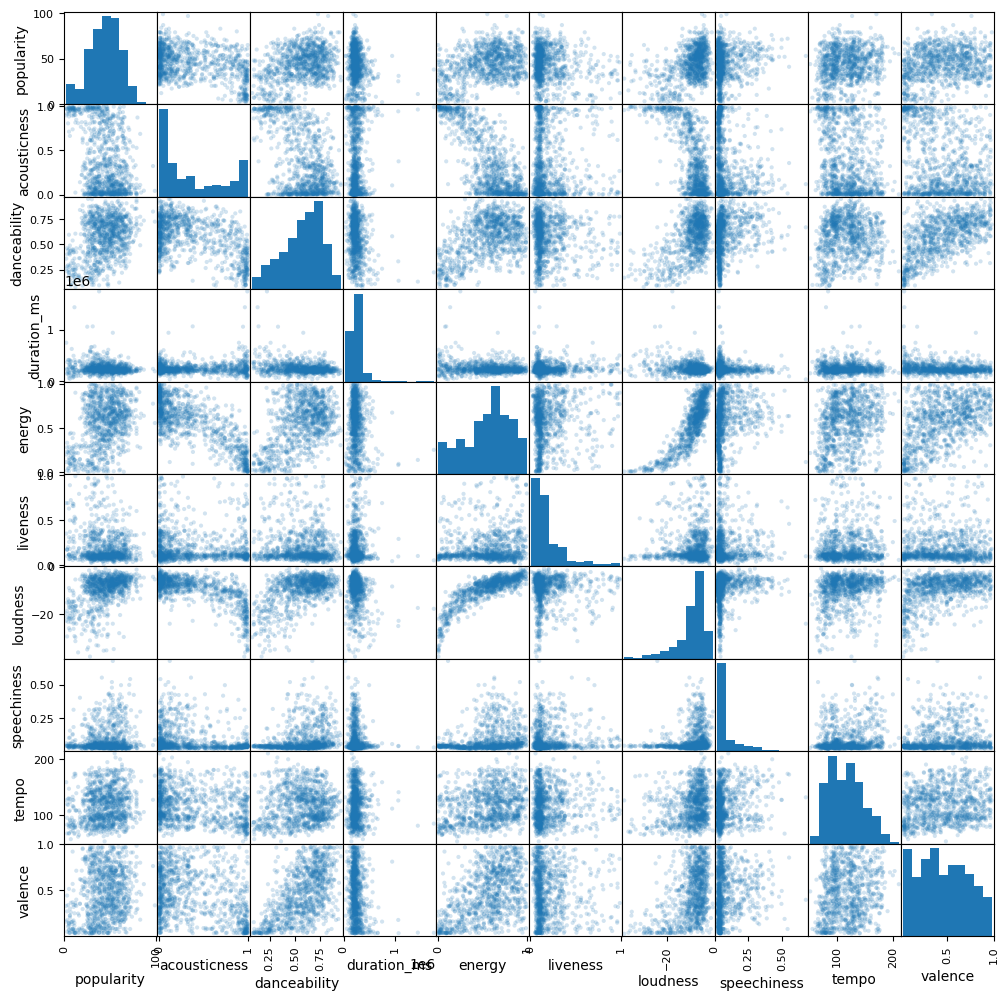

In [24]:
# Correlación de atributos
# Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
pd.plotting.scatter_matrix(spotify, alpha=0.2, figsize=(12,12))

<AxesSubplot:>

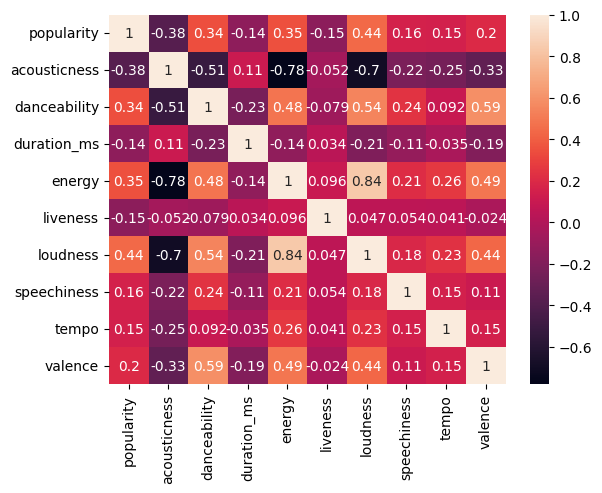

In [28]:
# Correlación de atributos
# Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un gráfico de tipo heatmap 
# ¿Existen variables correlacionadas? ¿Es esperable o no?

pearson = spotify.corr(method='pearson')
#plt.matshow(pearson) -> matriz
sns.heatmap(pearson, annot=True)

In [ ]:
# A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
# interesantes para formular sobre los datos propuestos.
# Por ejemplo, ¿existe alguna relación entre el género musical y alguna de las otras variables?

In [ ]:
# Elegir dos visualizaciones que permitan abordar sus preguntas de investigación e interpretar los resultados.